In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gender = ['Male', 'Female']
income = ['Poor', 'Middle Class', 'Rich']

In [4]:
n = 500
gender_data = []
income_data = []

In [5]:
for i in range(0,n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))
    

In [10]:
Height = 160 + 15 * np.random.randn(n)
Weight = 60 + 10 * np.random.randn(n)
Age = 25 + 10 * np.random.randn(n)
Income = 1.8 + 5.0 * np.random.randn(n)

In [27]:
data = pd.DataFrame({
    'Gender': gender_data,
    'Economic status': income_data,
    'Height': Height,
    'Weight': Weight,
    'Age': Age,
    'Income': Income
})

In [28]:
data.shape

(500, 6)

In [29]:
data.head()

,Gender,Economic status,Height,Weight,Age,Income
0,Male,Middle Class,180.480378,60.024421,20.555177,6.031872
1,Male,Middle Class,154.952214,52.299638,20.478671,3.227276
2,Male,Rich,172.386120,59.313532,28.789046,-4.861818
3,Female,Rich,180.399704,62.319323,15.812870,1.257620
4,Female,Poor,158.279528,61.693562,33.465420,3.568157


In [30]:
%matplotlib inline

(array([  7.,   9.,  43.,  66., 101., 102.,  95.,  54.,  17.,   6.]),
 array([-13.05294734, -10.17030079,  -7.28765423,  -4.40500768,
         -1.52236113,   1.36028542,   4.24293198,   7.12557853,
         10.00822508,  12.89087163,  15.77351819]),
 <a list of 10 Patch objects>)

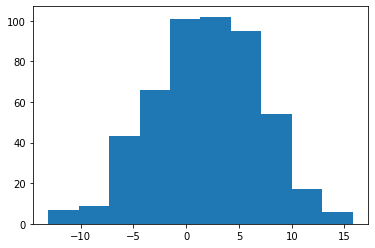

In [31]:
plt.hist(data['Income'])

(array([  7.,   9.,  43.,  66., 101., 102.,  95.,  54.,  17.,   6.]),
 array([-13.05294734, -10.17030079,  -7.28765423,  -4.40500768,
         -1.52236113,   1.36028542,   4.24293198,   7.12557853,
         10.00822508,  12.89087163,  15.77351819]),
 <a list of 10 Patch objects>)

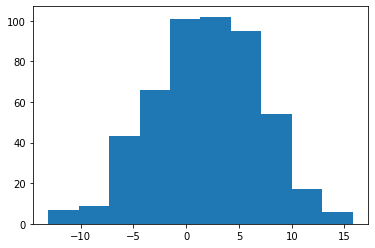

In [32]:
plt.hist(data['Income'])

In [33]:
data['Income'] = data['Income'].abs()
data['Age'] = data['Age'].abs()
data

,Gender,Economic status,Height,Weight,Age,Income
0,Male,Middle Class,180.480378,60.024421,20.555177,6.031872
1,Male,Middle Class,154.952214,52.299638,20.478671,3.227276
2,Male,Rich,172.386120,59.313532,28.789046,4.861818
3,Female,Rich,180.399704,62.319323,15.812870,1.257620
4,Female,Poor,158.279528,61.693562,33.465420,3.568157
...,...,...,...,...,...,...
495,Male,Middle Class,182.632711,75.924981,32.571642,6.491571
496,Male,Rich,159.285098,81.090873,35.004438,7.875987
497,Male,Poor,174.454047,58.850118,31.692233,0.224531
498,Male,Poor,155.964741,53.063027,24.686102,2.835142


In [36]:
data.describe()

,Height,Weight,Age,Income
count,500.000000,500.000000,500.000000,500.000000
mean,159.011729,60.428075,24.986391,4.404720
std,15.386155,9.984515,9.884806,3.200061
min,109.408205,25.037061,0.469334,0.017182
25%,149.438126,54.007518,18.488626,1.759551
50%,159.469938,60.498137,24.715125,3.985457
75%,168.635139,66.760053,31.915110,6.456660
max,204.346372,88.144150,57.004202,15.773518
